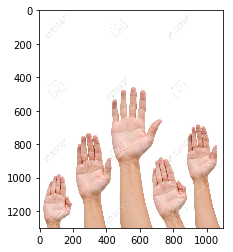

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/raised_hand.jpg')

# make copy
image_copy = np.copy(image)

# change color to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Produce a binary image for finding contours

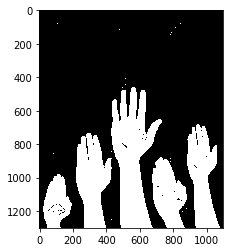

In [12]:
# convert the image to gray scale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a binary threashold image 
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

## Find and draw the contours

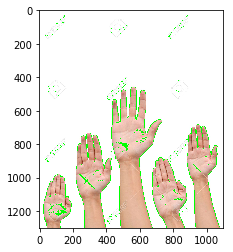

In [13]:
# find controus from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
## contour retrieval mode, counter approximation method
## hierarchy : relationship with one another

image_copy2 = np.copy(image_copy)
# draw all countrous on a copy of the image
all_countours = cv2.drawContours(image_copy2, contours, -1, (0, 255, 0), 2)

plt.imshow(all_countours)

## Contours Not working

error: /io/opencv/modules/imgproc/src/shapedescr.cpp:358: error: (-201) There should be at least 5 points to fit the ellipse in function fitEllipse


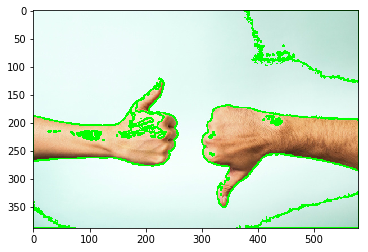

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in an image and convert to RGB
image = cv2.imread('images/thumbs_up_and_down.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# Find contours from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0,255,0), 2)
plt.imshow(contour_image)

def orientations(contours):
    """
    Orientation 
    :param cnt: a list of contours
    :return: the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    for contour in contours:
        # print(contour) : set of array
        (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
        print(angle)
        angles.append(angle)
    return angles
    
# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))



# Contour Features 2 

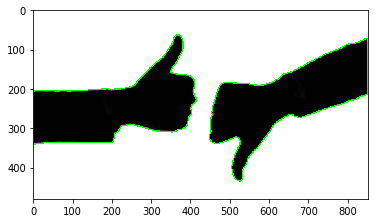

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in an image and convert to RGB
image = cv2.imread('images/6.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# Find contours from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0,255,0), 2)
plt.imshow(contour_image)

In [31]:
def orientations(contours):
    """
    Orientation 
    :param cnt: a list of contours
    :return: the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    for contour in contours:
        # print(contour) : set of array
        (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
        print(angle)
        angles.append(angle)
    return angles
    


# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))



60.5482673645
71.1507492065
Angles of each contour (in degrees): [60.54826736450195, 71.15074920654297]


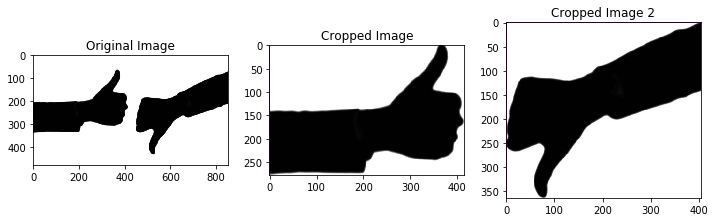

In [37]:
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param contours: the contour that will be used for cropping
    :return: the cropped image around the left hand
    """
    ## TODO: Detect the bounding rectangle of the left hand contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    ## TODO: Crop the image using the dimensions of the bounding rectangle
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    
    box_image = cv2.rectangle(cropped_image, (x,y), (x+w,y+h), (200,0,200),2)
    cropped_image = box_image[y: y + h, x: x + w]
    
    return cropped_image


## TODO: Select the left hand contour from the list
## Replace this value
selected_contour = contours[1]


# ---------------------------------------------------------- #
# If you've selected a contour
if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    
    # Display the cropped image side-by-side with the original
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image')
    ax2.imshow(cropped_image)
    ax2.set_title('Cropped Image')
    
    cropped_image2 = left_hand_crop(image, contours[0])
    ax3.imshow(cropped_image2)
    ax3.set_title('Cropped Image 2')